## Part 5: Application of supervised learning

In [1]:
import math
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df = pd.read_csv("twitchdata-update.csv")

We chose to work on a dataset about the 1000 biggest twitch streamers

In [3]:
#df.insert(0, 'Id', range(0, 0 + len(df))
df

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
...,...,...,...,...,...,...,...,...,...,...,...
995,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,True,False,Spanish
996,빅헤드 (bighead033),122523705,153000,3940,793,213212,52289,4399897,True,False,Korean
997,마스카 (newmasca),122452320,217410,6431,567,109068,-4942,3417970,True,False,Korean
998,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English


In [4]:
import seaborn as sns 
#sns.histplot(data=df, x="Watch time(Minutes)")


### Means & Standard deviation

In [5]:
print("Means:\n", df.mean(), sep="")
print("\nStandard deviations:\n", df.std(), sep="")

Means:
Watch time(Minutes)     4.184279e+08
Stream time(minutes)    1.205152e+05
Peak viewers            3.706505e+04
Average viewers         4.781040e+03
Followers               5.700541e+05
Followers gained        2.055185e+05
Views gained            1.166817e+07
Partnered               9.780000e-01
Mature                  2.300000e-01
dtype: float64

Standard deviations:
Watch time(Minutes)     5.496355e+08
Stream time(minutes)    8.537620e+04
Peak viewers            6.031431e+04
Average viewers         8.453685e+03
Followers               8.044134e+05
Followers gained        3.399137e+05
Views gained            2.490572e+07
Partnered               1.467567e-01
Mature                  4.210431e-01
dtype: float64


### Outliers

Non linear

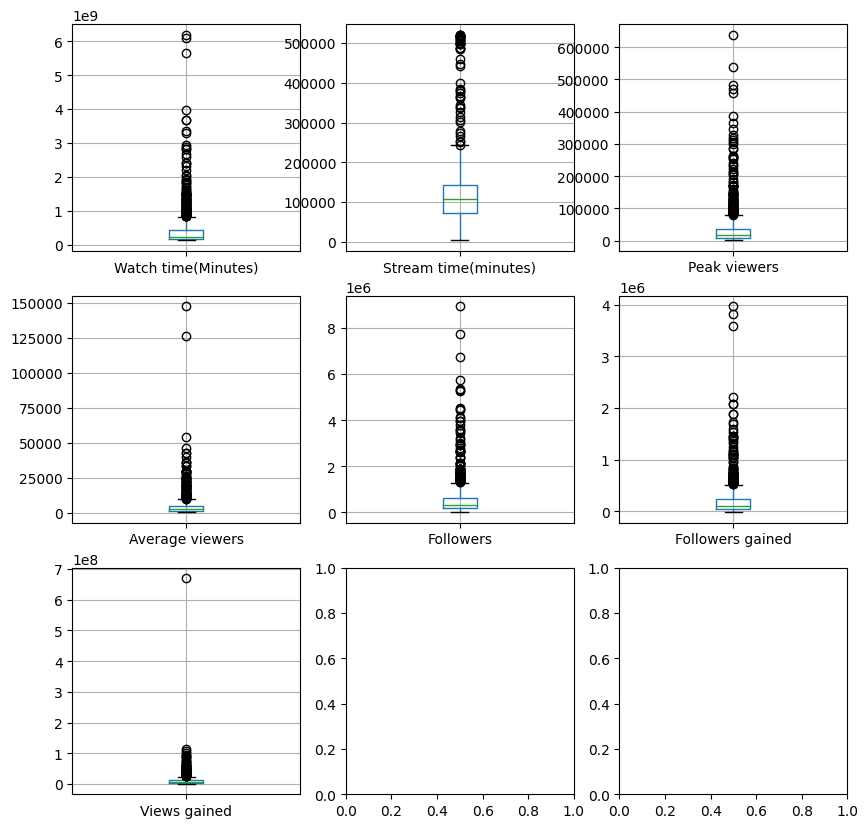

In [6]:
fig, axs = plt.subplots(3, 3)
fig.set_figwidth(10)
fig.set_figheight(10)

_, bp1 = df.boxplot(column="Watch time(Minutes)", return_type='both', ax=axs[0, 0])
_, bp2 = df.boxplot(column="Stream time(minutes)", return_type='both', ax=axs[0, 1])
_, bp3 = df.boxplot(column="Peak viewers", return_type='both', ax=axs[0, 2])
_, bp4 = df.boxplot(column="Average viewers", return_type='both', ax=axs[1, 0])
_, bp5 = df.boxplot(column="Followers", return_type='both', ax=axs[1, 1])
_, bp6 = df.boxplot(column="Followers gained", return_type='both', ax=axs[1, 2])
_, bp7 = df.boxplot(column="Views gained", return_type='both', ax=axs[2, 0])

#outliers = [flier.get_ydata() for flier in bp7["fliers"]][0]
#print(np.sort(outliers)[::-1])

### Correlation heatmap

<AxesSubplot:>

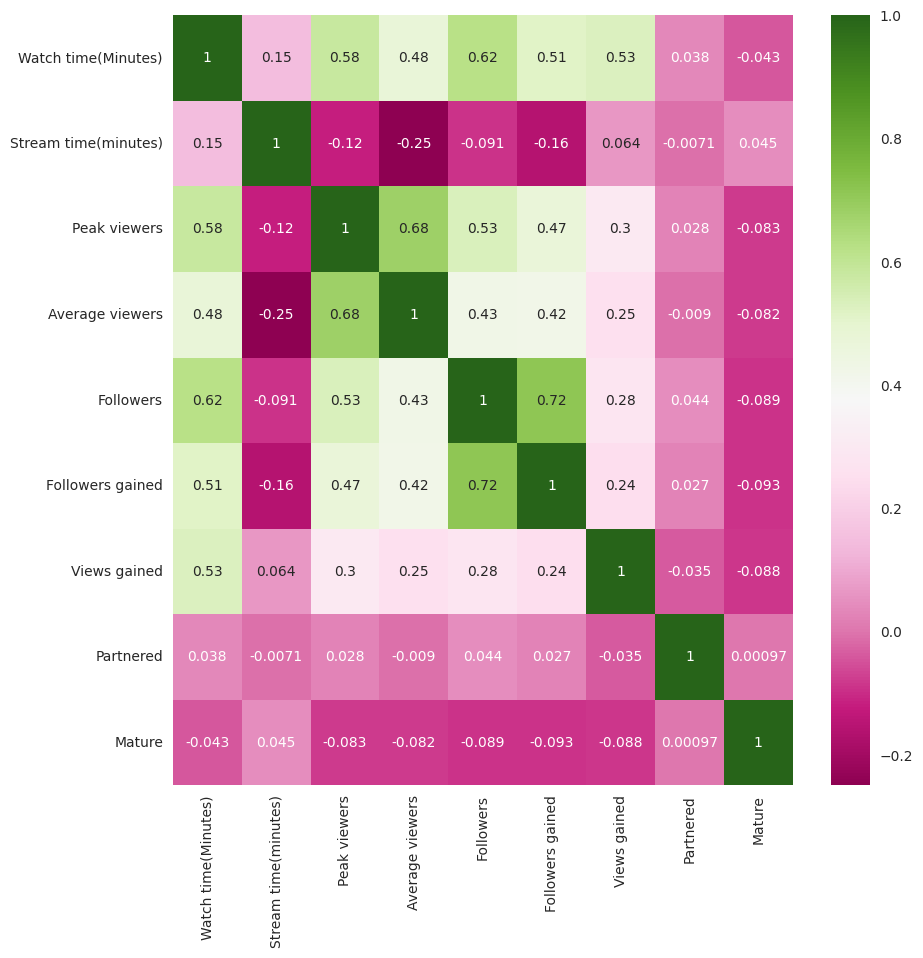

In [7]:
plt.style.use("seaborn")

df.head()
plt.figure(figsize=(10,10))
#df = df.drop(["Partnered", "Mature"], axis=1)
c = df.corr()
sns.heatmap(c,cmap='PiYG',annot=True)

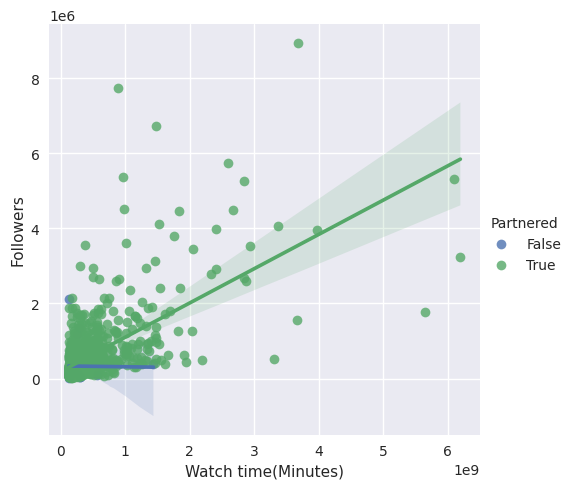

In [8]:
#plt.style.use("default")

sns.lmplot(x="Watch time(Minutes)", y="Followers", data=df, hue="Partnered")

We can see a large mojority of streamer are partnered

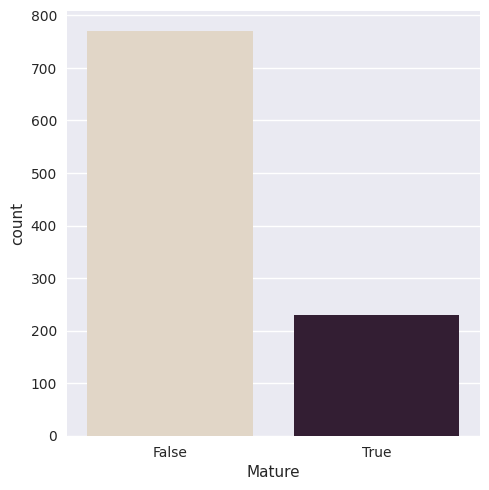

In [9]:
#sns.lmplot(x="Watch time(Minutes)", y="Followers", data=df, hue="Mature")
sns.catplot(data=df, x="Mature", kind="count", palette="ch:.25")

We can see the a high proportion for top 999 streamer are not restricted on +18 stream

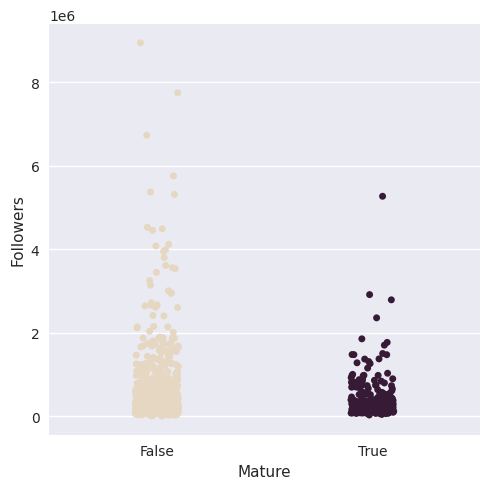

In [10]:
sns.catplot(data=df, x="Mature", y="Followers", palette="ch:.25", hue="Mature")

Streamer with highest followers do not activate the mature content warning for their viewers

In [11]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(df[['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers', 'Average viewers']], df.Followers)

print(reg.coef_)

[ 7.56771911e-04 -1.35217241e+00  2.85065656e+00  3.89327656e-02]


In [12]:
print(reg.predict([[10, 10, 10, 10]]))

[310526.35035751]
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


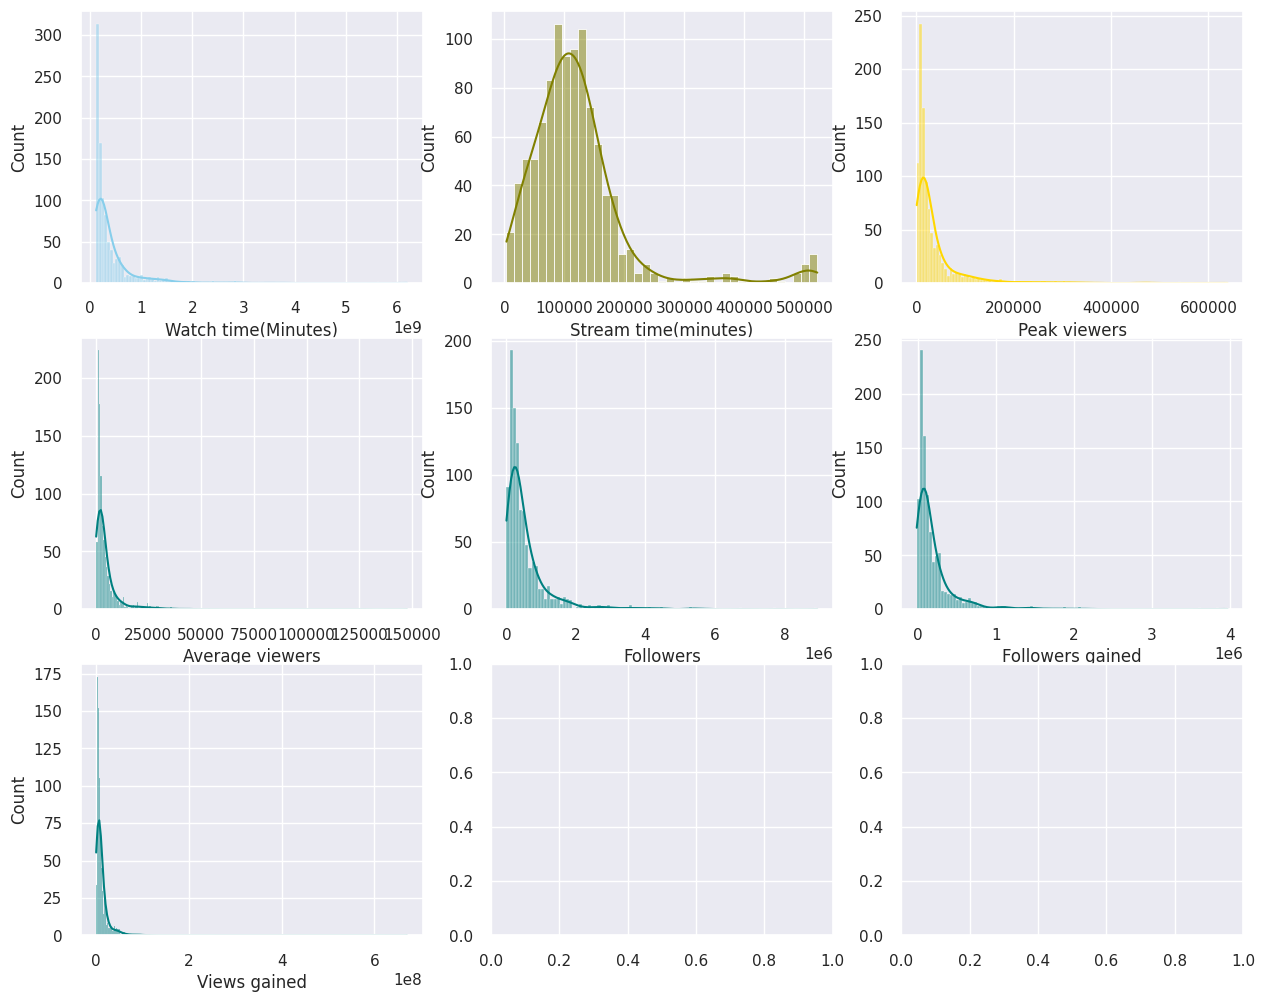

In [13]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(3, 3, figsize=(7, 7))
fig.set_figwidth(15)
fig.set_figheight(12)

sns.histplot(data=df, x="Watch time(Minutes)", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="Stream time(minutes)", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="Peak viewers", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=df, x="Average viewers", kde=True, color="teal", ax=axs[1, 0])
sns.histplot(data=df, x="Followers", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x="Followers gained", kde=True, color="teal", ax=axs[1, 2])
sns.histplot(data=df, x="Views gained", kde=True, color="teal", ax=axs[2, 0])

plt.show()

<AxesSubplot:xlabel='Ranking by number of followers', ylabel='Followers gained'>

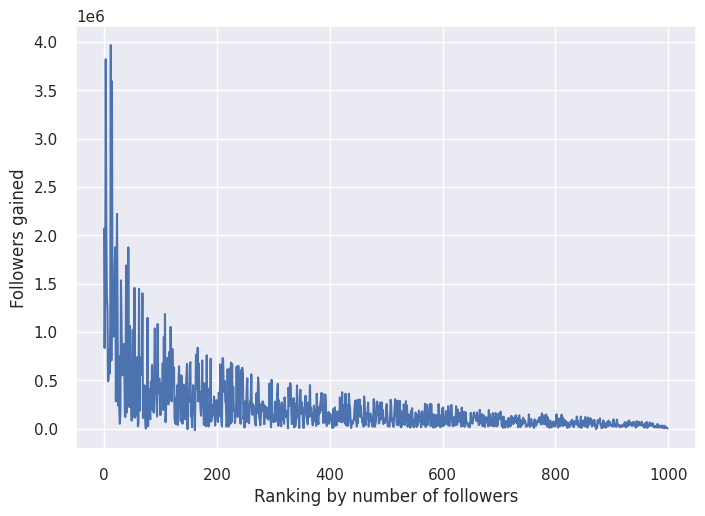

In [14]:
sns.set(style="darkgrid")

fig, ax = plt.subplots()
ax.set_xlabel("Ranking by number of followers")
df = df.sort_values(by="Followers", ascending=False)
df_followers = df.reset_index()
sns.lineplot(data=df_followers, y="Followers gained", x=df_followers.index)

In [15]:
df_followers.tail()

,index,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
995,923,칸데르니아 (jmjdoc),131408250,170865,2395,756,30877,9502,4337476,True,False,Korean
996,828,MarketTradersTV,148900110,499215,1357,297,30413,12081,981536,True,False,English
997,677,NiteNightKid,178419030,149040,29228,1127,28818,11998,1450208,True,True,English
998,974,Sinner666,124812240,24765,27996,4530,7102,7101,21322548,False,False,Russian
999,758,voicetv,162510660,514845,1874,314,3660,1328,4001475,True,False,Thai


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e02551f1-9953-47df-879b-6776493df133' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>